# Module 1- Merging DataFrames with PANDAS

## Activation

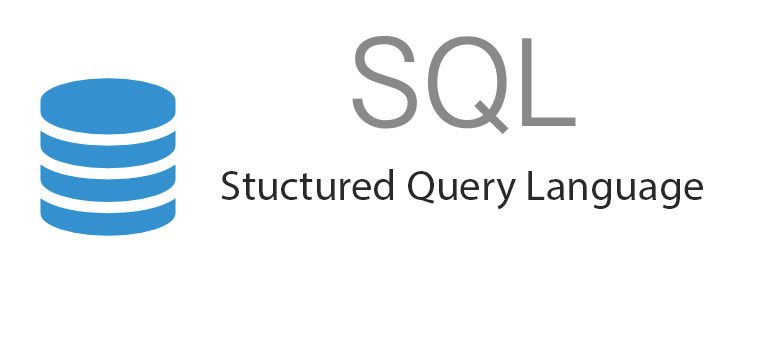


- PANDAS and SQL are two of the three main tools along with R used by data scientist. 
- https://towardsdatascience.com/how-to-avoid-rookie-mistakes-in-the-field-of-data-science-3076017cdab1


![merg_panda](https://raw.githubusercontent.com/Raigred/mlcourse.ai/master/img/merg_panda.jpg "merg_panda")

## Merge Types

Pandas has the merge types listed below. These merge types are common across most database and data-orientated languages (SQL, R, SAS) and are typically referred to as “joins”. 

* **Inner Merge / Inner join** – The default Pandas behaviour, only keep rows where the merge “on” value exists in both the left and right dataframes.

* **Left Merge / Left outer join** – (aka left merge or left join) Keep every row in the left dataframe. Where there are missing values of the “on” variable in the right dataframe, add empty / NaN values in the result.  

* **Right Merge / Right outer join** – (aka right merge or right join) Keep every row in the right dataframe. Where there are missing values of the “on” variable in the left column, add empty / NaN values in the result.  

* **Outer Merge / Full outer join** – A full outer join returns all the rows from the left dataframe, all the rows from the right dataframe, and matches up rows where possible, with NaNs elsewhere.

The `merge` type to use is specified using the `how` parameter in the merge command, taking values `left`, `right`, `inner` (default), or `outer`.

Venn diagrams are commonly used to exemplify the different merge and join types.

![Venn diagrams](https://raw.githubusercontent.com/Raigred/mlcourse.ai/master/img/join-types-merge-names.jpg "Venn diagrams")

In [ ]:
import pandas as pd

In [ ]:
data_1 = [('Houston', 'Samantha','18' ),
         ('Seattle','Alex','17'),
         ('New York','Dante','26')]
labels_1 = ['city','name', 'age']

data_2 = [('Houston', 'John', '21' ),
         ('Atlanta','Heather','17'),
         ('New York','Sara','26')]
labels_2 = ['city','name', 'age']

In [ ]:
data_1 = pd.DataFrame.from_records(data_1, columns=labels_1)
data_2 = pd.DataFrame.from_records(data_2, columns=labels_2)

In [ ]:
data_1

In [ ]:
data_2

### Merging DataFrames


- An *inner merge, (or inner join)* keeps only the common values in both the left and right dataframes for the result.

In [ ]:
combined = pd.merge(data_1, data_2, on='city')

In [ ]:
# How many rows should we have?
combined

- This is great but what about if two students in the same city have the same name?

In [ ]:
data_1 = [('01','Houston', 'Samantha','18' ),
         ('02','Seattle','Alex','17'),
         ('03','New York','Dante','26')]
labels_1 = ['ID','city','name', 'age']

data_2 = [('04','Houston', 'Samantha', '21' ),
         ('05','Atlanta','Heather','17'),
         ('06','New York','Sara','26')]
labels_2 = ['ID','city','name', 'age']

In [ ]:
data_1 = pd.DataFrame.from_records(data_1, columns=labels_1)
data_2 = pd.DataFrame.from_records(data_2, columns=labels_2)

In [ ]:
data_1

In [ ]:
data_2

In [ ]:
merge_by_city = pd.merge(data_1, data_2, on='city')
print(merge_by_city)

In [ ]:
merge_by_name = pd.merge(data_1, data_2, on='name')
print(merge_by_name)

### Merging on columns with non-matching labels

- What if in one data set the name is recorded as **first name**?

In [ ]:
data_1 = [('01','Houston', 'Samantha','18' ),
         ('02','Seattle','Alex','17'),
         ('03','New York','Dante','26')]
labels_1 = ['ID','city','name', 'age']

data_2 = [('04','Houston', 'Samantha', '21' ),
         ('05','Atlanta','Heather','17'),
         ('06','New York','Sara','26')]
labels_2 = ['ID','city','first_name', 'age']

In [ ]:
data_1 = pd.DataFrame.from_records(data_1, columns=labels_1)
data_2 = pd.DataFrame.from_records(data_2, columns=labels_2)

In [ ]:
# What happens when we try to merge?
combined = pd.merge(data_1, data_2,on='name')
print(combined)

In [ ]:
combined = pd.merge(data_1, data_2, left_on='name', right_on='first_name')
print(combined)

### Merging on multiple columns  


In [ ]:
# Let's add a state for each data set.
data_1['state'] = ['TX','WA','NY']
data_2['state'] = ['TX','GA','NY']

In [ ]:
data_1

In [ ]:
data_2

In [ ]:
# Merge data sets on 'age', 'city'
merge_multi = pd.merge(data_1, data_2, on=['age', 'city'])
print(merge_multi)

### Right Merge / Right outer join

- (aka right merge or right join) Keep every row in the right dataframe. Where there are missing values of the “on” variable in the left column, add empty / NaN values in the result.

In [ ]:
right_merge = pd.merge(data_1, data_2, how='right', on=['city', 'state'])

In [ ]:
right_merge

### Left Merge / Left outer join

- (aka left merge or left join) Keep every row in the left dataframe. Where there are missing values of the “on” variable in the right dataframe, add empty / NaN values in the result.

In [ ]:
left_merge = pd.merge(data_1, data_2, how='left', left_on=['city', 'name'], right_on=['city', 'first_name'])
print(left_merge)

### Outer Merge / Full outer join

- A full outer join returns all the rows from the left dataframe, all the rows from the right dataframe, and matches up rows where possible, with NaNs elsewhere.

In [ ]:
merge_outer = pd.merge(data_1, data_2, how='outer')
print(merge_outer)

In [ ]:
merge_outer_on = pd.merge(data_1, data_2, how='outer', on=['city','state'])
print(merge_outer)